<a href="https://colab.research.google.com/github/shubham-hub/EDA-of-IPL/blob/main/EDA_of_IPL_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ipl = pd.read_csv('/content/drive/MyDrive/EDA Projects /Exploratory Data Analysis(EDA) of IPL dataset/matches.csv')

In [ ]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
ipl.shape

(636, 18)

In [ ]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [ ]:
ipl.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


##**Exploratory Data Analysis**
Let's begin some exploratory data analysis! We will start by checking out missing data


##**Missing data**
We can use seaborn to create a simple heatmap to see where we are missing data

In [ ]:
ipl.isnull()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
632,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
633,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
634,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


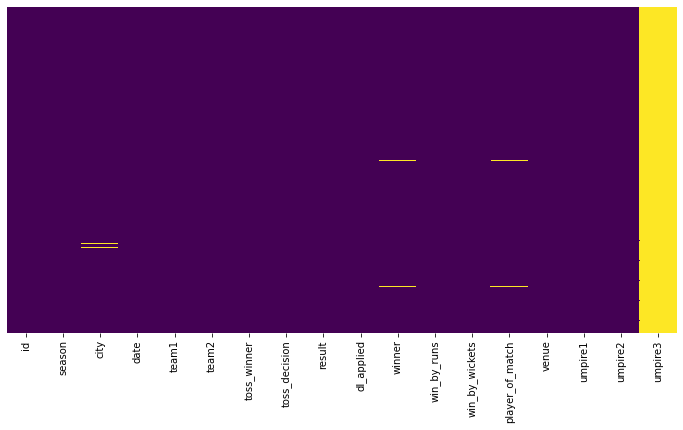

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(ipl.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
#getting the frequency of most man of the match awards 
ipl['player_of_match'].value_counts()

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
SK Raina          14
                  ..
RJ Harris          1
JD Ryder           1
GD McGrath         1
KS Williamson      1
RA Tripathi        1
Name: player_of_match, Length: 201, dtype: int64

In [ ]:
ipl['player_of_match'].value_counts()[0:5]

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
SK Raina          14
Name: player_of_match, dtype: int64

In [ ]:
list(ipl['player_of_match'].value_counts()[0:5].keys())

['CH Gayle', 'YK Pathan', 'DA Warner', 'AB de Villiers', 'SK Raina']

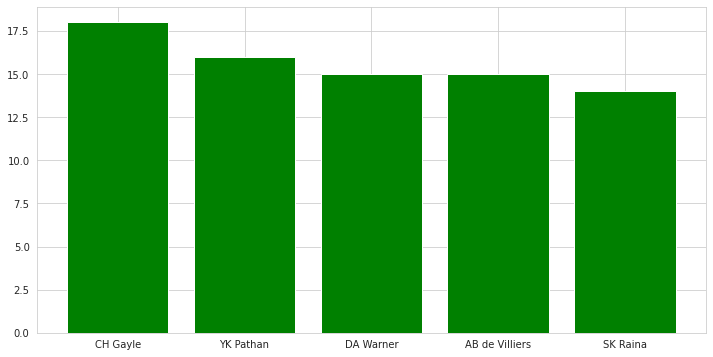

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
plt.bar(list(ipl['player_of_match'].value_counts()[0:5].keys()),list(ipl['player_of_match'].value_counts()[0:5]), color='g')
plt.show()

In [ ]:
ipl['result'].value_counts()

normal       626
tie            7
no result      3
Name: result, dtype: int64

In [ ]:
ipl['toss_winner'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [ ]:
batting_first=ipl[ipl['win_by_runs']!=0]

In [ ]:
batting_first.shape

(287, 18)

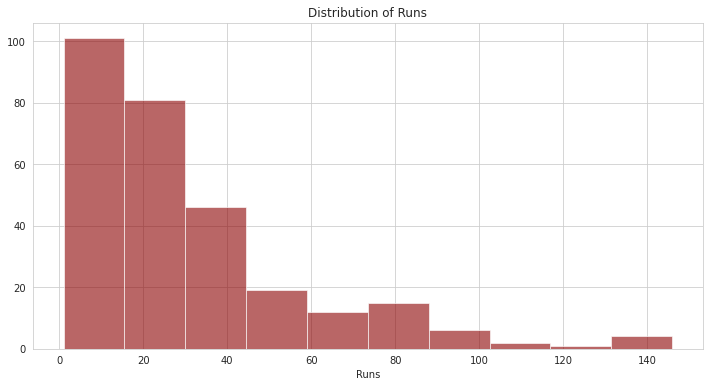

In [ ]:
plt.figure(figsize=(12,6))
batting_first['win_by_runs'].hist(bins=10,color='darkred',alpha=0.6)
plt.title('Distribution of Runs')
plt.xlabel('Runs')
plt.show()

In [ ]:
#finding out the number of wins w.r.t each team after batting first
batting_first['winner'].value_counts()

Mumbai Indians                 47
Chennai Super Kings            46
Kings XI Punjab                32
Kolkata Knight Riders          31
Royal Challengers Bangalore    30
Sunrisers Hyderabad            23
Rajasthan Royals               23
Delhi Daredevils               21
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

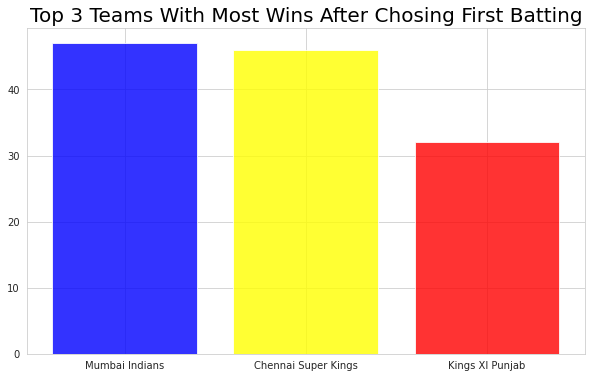

In [ ]:
#making bar plot for top 3 teams with most wins after batting first
plt.figure(figsize=(10,6)) 
sns.set_style('whitegrid')
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()),list(batting_first['winner'].value_counts()[0:3]),color=['blue','yellow','red'],alpha=0.8)
plt.title('Top 3 Teams With Most Wins After Chosing First Batting',fontdict={'fontsize':20,'color':'black'})
plt.show()

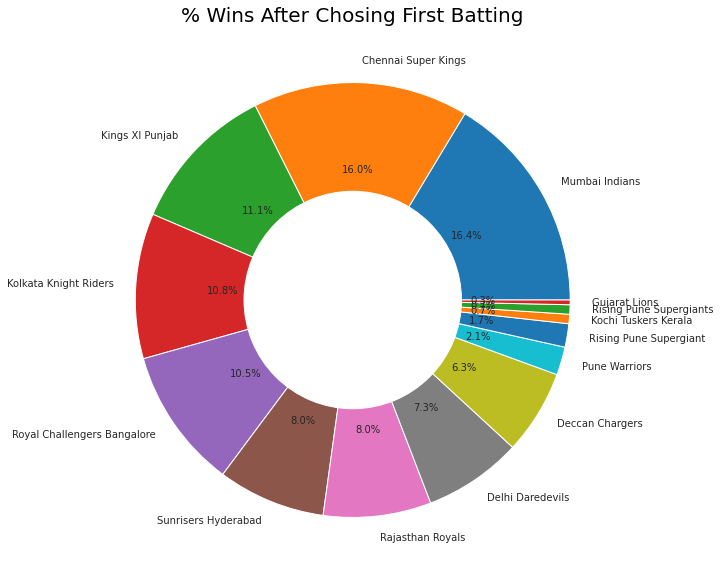

In [ ]:
#making a pie chart 
plt.figure(figsize=(10,10))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%',radius=1)
plt.pie([1],colors=['w'],radius=0.5)
plt.title('% Wins After Chosing First Batting',fontdict={'fontsize':20,'color':'black'})
plt.show()

In [ ]:
#extracting those records where the team has won after batting second 
batting_second = ipl[ipl['win_by_wickets']!=0]

In [ ]:
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


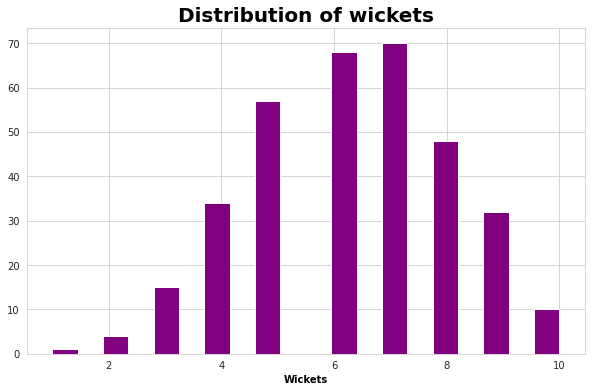

In [87]:
#making a histogram for frequency of wins w.r.t number of wickets
plt.figure(figsize=(10,6))
plt.hist(batting_second['win_by_wickets'],bins=20,color='purple')
plt.title('Distribution of wickets',fontdict={'fontsize':20,'color':'black','fontweight':'bold'})
plt.xlabel('Wickets',fontdict={'fontsize':10,'color':'black','fontweight':'bold'},)
plt.show()

In [88]:
#finding out the number of wins w.r.t each team after batting second
batting_second['winner'].value_counts()

Kolkata Knight Riders          46
Mumbai Indians                 44
Royal Challengers Bangalore    42
Delhi Daredevils               41
Rajasthan Royals               38
Kings XI Punjab                36
Chennai Super Kings            33
Sunrisers Hyderabad            18
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

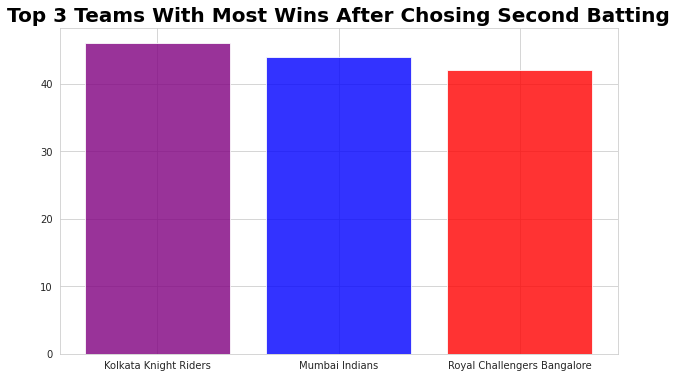

In [94]:
#making a bar plot for top 3 teams with most wins after batting second 
plt.figure(figsize=(10,6))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()),list(batting_second['winner'].value_counts()[0:3]),color=['purple','blue','red'],alpha=0.8)
plt.title('Top 3 Teams With Most Wins After Chosing Second Batting',fontdict={'fontsize':20,'color':'black','fontweight':'bold'})
plt.show()

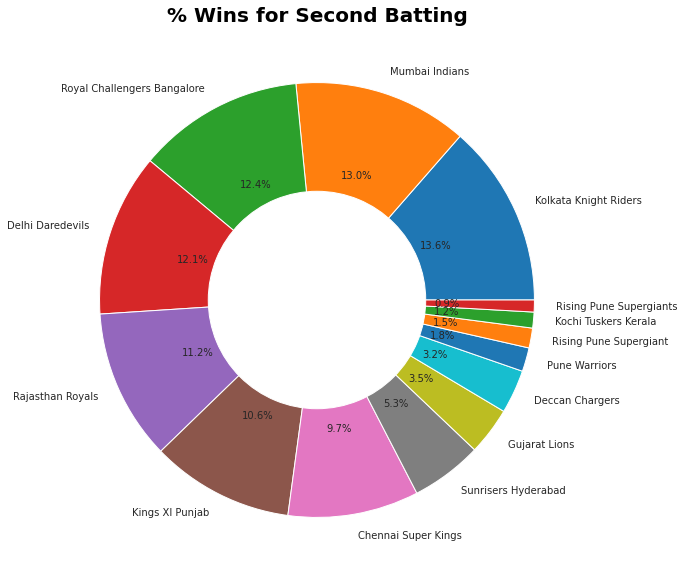

In [101]:
#making pie chart for distribution of most wins after batting second 
plt.figure(figsize=(10,10))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%',radius=1)
plt.pie([1],colors=['w'],radius=0.5)
plt.title('% Wins for Second Batting',fontdict={'fontsize':20,'color':'black','fontweight':'bold'})
plt.show()

In [105]:
#looking at number of matches played each season
ipl['season'].value_counts()


2013    76
2012    74
2011    73
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [104]:
ipl['city'].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Ranchi             7
Cuttack            7
Port Elizabeth     7
Cape Town          7
Abu Dhabi          7
Sharjah            6
Raipur             6
Kochi              5
Indore             5
Kanpur             4
Kimberley          3
Nagpur             3
East London        3
Bloemfontein       2
Name: city, dtype: int64

In [112]:
#finding out how many times a team has won a match after winning a toss
np.sum(ipl['toss_winner']==ipl['winner'])

325

In [114]:
print('probabilty of team winning a math when they win a toss = ', 325/636)

probabilty of team winning a math when they win a toss =  0.5110062893081762
